# Lab 2: Drawing WordClouds using textual data


The goal of this lab is to learn how to filter rows from dataframe and to draw WordCloud using texts.

This lab is written by Dr. Jisun AN (jisunan@smu.edu.sg). 

# Check the Week 1 reflection data

The week 1 reflection data is stored in .csv format (data_week1_reflection.csv). You can open the file through MS Excel or Google Spreadsheets.

# Pandas

[Pandas](https://pandas.pydata.org/) are widely used libraries to support handling tabular data. 
I can say that pandas is the defacto standard libarary.
Let's import pandas.

As typing 'pandas' is hard (...), in most cases, pandas is imported like below:

In [1]:
import pandas as pd


Then, you can read csv file.

In [2]:
df = pd.read_csv('data_week1_reflection.csv', sep=',')
df.head(n=5)

,section,enjoyable_comp,challenging_comp,rating,suggestion
0,G1,lecture,understanding how we combine both worlds,4,NaN
1,G1,WOOCLAP,Nil,4,Nil
2,G1,learning about the many cons and limitations o...,NIL,4,NaN
3,G1,"real-life examples that prof gave, like the th...",-,4,NaN
4,G1,WOOCLAP,NIL,4,NIL


In [4]:
G1 = df.query('section == "G1"')
G2 = df.query('section == "G2"')

By default, read_csv() function assumes that the separator as ','. Thus, we can omit it like below:

You can also see the n rows from the bottom by tail().

In [3]:
df.tail(n=5)

,section,enjoyable_comp,challenging_comp,rating,suggestion
70,G2,The most enjoyable component was the in class ...,"For the first lesson, it was a little challeng...",4,NaN
71,G2,The wooclap questions and seeing the different...,The components taught today was alright and I ...,4,NIL
72,G2,I really enjoyed the different perspectives an...,Trying to visualise data science concepts and ...,4,NIL
73,G2,using wooclap to gather results on our usage o...,I think that class was extremely manageable to...,4,NaN
74,G2,The survey of social media popularity,Nothing for now,3,NaN


You can check the number of rows and columns by .shape

In [4]:
df.shape

(75, 5)

In [5]:
print (f'{df.shape[0]} rows and {df.shape[1]} columns')

75 rows and 5 columns


# Extract data of G1 section

You can filter dataframe by query(). See the official API from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

## Extract rows whose section is G1

In [6]:
df_G1 = df.query('section == "G1"')
df_G1.head()

,section,enjoyable_comp,challenging_comp,rating,suggestion
0,G1,lecture,understanding how we combine both worlds,4,NaN
1,G1,WOOCLAP,Nil,4,Nil
2,G1,learning about the many cons and limitations o...,NIL,4,NaN
3,G1,"real-life examples that prof gave, like the th...",-,4,NaN
4,G1,WOOCLAP,NIL,4,NIL


In [7]:
df_G1.shape

(32, 5)

In [ ]:
df_G1.tail()

In [ ]:
df_G1.shape

# Exercise: ## Extract rows whose section is G2

In [8]:
df_G2 = df.query('section == "G2"')

In [ ]:
df_G2.head()

In [ ]:
df_G2.tail()

In [9]:
df_G2.shape

(43, 5)

# # of the rows in the original file = # of the rows in G1 + # of the rows in G2

In [10]:
# You should get 'True' for the below equation

df.shape[0] == df_G1.shape[0] + df_G2.shape[0]

True

# Draw a word cloud

A word cloud, which has been populary used as a tag cloud in the era of Blogs, is often used to show which words frequently appear. Detail explanations are available on https://en.wikipedia.org/wiki/Tag_cloud

## Install wordcloud library

As Python is the most popular programming language today, many libraries for a variety of jobs have been developed. <br/>
Today we use the 'wordcloud' library. You can see more info via https://github.com/amueller/word_cloud

In [ ]:
!conda install --yes -c conda-forge wordcloud

## import required libraries to draw

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Drawing a word cloud of enjoyable components

Let's draw the word cloud of enjoyable components.<br/>
As WordCloud() function requires a staring as a parameter, we need to concatenate all the rows of the 'enjoyable_comp' column to a single string by join().

In [ ]:
df['enjoyable_comp'][2]

In [ ]:
for one_row in df['enjoyable_comp'][:10]:
    print(one_row)


In [12]:
smaple = ['jisun', 'is', 'cool']


In [13]:
" ".join(smaple)

'jisun is cool'

In [14]:
df['enjoyable_comp'][:10]

0                                              lecture
1                                              WOOCLAP
2    learning about the many cons and limitations o...
3    real-life examples that prof gave, like the th...
4                                              WOOCLAP
5                                              wooclap
6    The class wooclap quizzes was interactive and ...
7    the introduction to the 10 characteristics of ...
8                                         The quizzes!
9                              Intro to social science
Name: enjoyable_comp, dtype: object

In [15]:
[one_row for one_row in df['enjoyable_comp'][:10]]

['lecture',
 'WOOCLAP',
 'learning about the many cons and limitations of big data',
 'real-life examples that prof gave, like the theft one and the server crushed one',
 'WOOCLAP',
 'wooclap',
 'The class wooclap quizzes was interactive and engaging.',
 'the introduction to the 10 characteristics of big data',
 'The quizzes!',
 'Intro to social science']

In [16]:
" ".join(one_row for one_row in df['enjoyable_comp'][:10])


'lecture WOOCLAP learning about the many cons and limitations of big data real-life examples that prof gave, like the theft one and the server crushed one WOOCLAP wooclap The class wooclap quizzes was interactive and engaging. the introduction to the 10 characteristics of big data The quizzes! Intro to social science'

In [ ]:
enjoyable_comp_text = " ".join(one_row for one_row in df['enjoyable_comp'])


In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(enjoyable_comp_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("enjoyable_comp.png")

## Challenging component

Similarly, we can draw challenging component.

In [ ]:
challenging_comp_text = " ".join(one_row for one_row in df['challenging_comp'])

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=1000, height=500).generate(challenging_comp_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("challenging_comp.png")

In [17]:
challenging_comp_text_G1 = " ".join(one_row for one_row in df_G1['challenging_comp'])

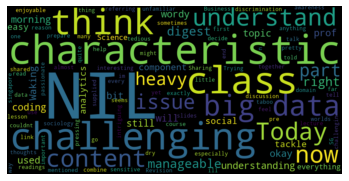

In [18]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=1000, height=500).generate(challenging_comp_text_G1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# wordcloud.to_file("challenging_comp.png")

In [19]:
challenging_comp_text_G2 = " ".join(one_row for one_row in df_G2['challenging_comp'])

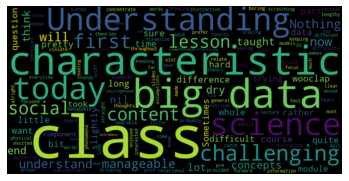

In [20]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=1000, height=500).generate(challenging_comp_text_G2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# wordcloud.to_file("challenging_comp.png")

## Suggestion

We can draw the word cloud for suggestions as well.

In [ ]:
df['suggestion']

NaN is the empty value in .csv file. Since it occurs in string concatenation, we need to drop out by [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
suggestion_text = " ".join(str(one_row) for one_row in df['suggestion'].dropna())

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(suggestion_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("suggestion_comp.png")

We are curious about the context of 'Maybe'. 
You can search dataframe like below:

In [ ]:
df[df["suggestion"].str.contains("Maybe", na=False)]

When the width of the cell is not enough to read the whole sentence, you can directly access by [iloc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [ ]:
df[df["suggestion"].str.contains("Maybe", na=False)].iloc[0]['suggestion']